In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
data="pca_iris.data"

In [4]:
df=pd.read_csv(data, sep=",")
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
col_names=["sepal length","sepal width","petal length","petal width","target"]
df.columns=col_names

In [6]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [11]:
x=df.drop("target", axis=1)

In [12]:
x.head()

,sepal length,sepal width,petal length,petal width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [13]:
y=df[["target"]]

In [14]:
y.head()

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [16]:
x=StandardScaler().fit_transform(x)

In [17]:
x

array([[-1.1483555 , -0.11805969, -1.35396443, -1.32506301],
       [-1.3905423 ,  0.34485856, -1.41098555, -1.32506301],
       [-1.51163569,  0.11339944, -1.29694332, -1.32506301],
       [-1.02726211,  1.27069504, -1.35396443, -1.32506301],
       [-0.54288852,  1.9650724 , -1.18290109, -1.0614657 ],
       [-1.51163569,  0.8077768 , -1.35396443, -1.19326436],
       [-1.02726211,  0.8077768 , -1.29694332, -1.32506301],
       [-1.75382249, -0.34951881, -1.35396443, -1.32506301],
       [-1.1483555 ,  0.11339944, -1.29694332, -1.45686167],
       [-0.54288852,  1.50215416, -1.29694332, -1.32506301],
       [-1.2694489 ,  0.8077768 , -1.23992221, -1.32506301],
       [-1.2694489 , -0.11805969, -1.35396443, -1.45686167],
       [-1.87491588, -0.11805969, -1.52502777, -1.45686167],
       [-0.05851493,  2.19653152, -1.46800666, -1.32506301],
       [-0.17960833,  3.122368  , -1.29694332, -1.0614657 ],
       [-0.54288852,  1.9650724 , -1.41098555, -1.0614657 ],
       [-0.90616871,  1.

In [19]:
pca=PCA(n_components=2)
principalComponenets=pca.fit_transform(x)
principaldf=pd.DataFrame(data=principalComponenets, columns=["pcomponent 1","pcomponent 2"])

In [20]:
principaldf

,pcomponent 1,pcomponent 2
0,-2.107950,-0.644276
1,-2.387971,-0.305833
2,-2.324879,-0.562923
3,-2.405086,0.687591
4,-2.083204,1.530252
...,...,...
144,1.859771,0.379344
145,1.542004,-0.908086
146,1.509255,0.264606
147,1.369096,1.015839


In [22]:
principaldf_=pd.concat([principaldf,df[["target"]]], axis=1)

In [23]:
principaldf_

,pcomponent 1,pcomponent 2,target
0,-2.107950,-0.644276,Iris-setosa
1,-2.387971,-0.305833,Iris-setosa
2,-2.324879,-0.562923,Iris-setosa
3,-2.405086,0.687591,Iris-setosa
4,-2.083204,1.530252,Iris-setosa
...,...,...,...
144,1.859771,0.379344,Iris-virginica
145,1.542004,-0.908086,Iris-virginica
146,1.509255,0.264606,Iris-virginica
147,1.369096,1.015839,Iris-virginica


In [29]:
target=principaldf_.groupby("target")
target.count()

,pcomponent 1,pcomponent 2
target,,
Iris-setosa,49,49
Iris-versicolor,50,50
Iris-virginica,50,50


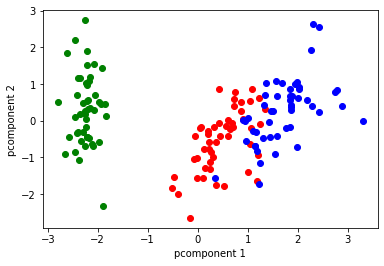

In [32]:
setosa_df=principaldf_[df.target=="Iris-setosa"]
versicolor_df=principaldf_[df.target=="Iris-versicolor"]
virginica_df=principaldf_[df.target=="Iris-virginica"]
plt.xlabel("pcomponent 1")
plt.ylabel("pcomponent 2")

plt.scatter(setosa_df["pcomponent 1"], setosa_df["pcomponent 2"], color="green")
plt.scatter(versicolor_df["pcomponent 1"], versicolor_df["pcomponent 2"], color="red")
plt.scatter(virginica_df["pcomponent 1"], virginica_df["pcomponent 2"], color="blue")

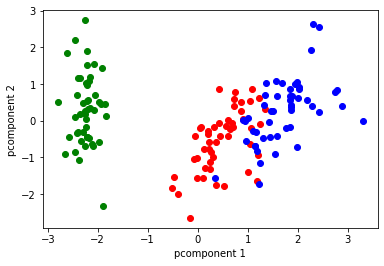

In [39]:
targets=["Iris-setosa","Iris-versicolor","Iris-virginica"]
colors=["g","r","b"]
plt.xlabel("pcomponent 1")
plt.ylabel("pcomponent 2")

for tar, col in zip(targets,colors):
  dftemp=principaldf_[df.target==tar]
  plt.scatter(dftemp["pcomponent 1"], dftemp["pcomponent 2"], color=col)



In [40]:
#varyansımızın ne kadarını koruduğumuza bakalım.farklılıkların ne kadarını korumuşuz

In [41]:
pca.explained_variance_ratio_

array([0.72620033, 0.23147407])

In [42]:
pca.explained_variance_ratio_.sum()

0.9576744018556446